In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
cancer = pd.read_csv("data.csv")

In [3]:
X = cancer[
    ["Smoothness", "Concavity", "Radius", "Texture", "Perimeter"]
]
y = cancer["Class"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    stratify=y,
    random_state=123
)

In [5]:
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

In [6]:
param_grid = {
    "knn__n_neighbors": range(1, 31, 2)
}

In [7]:
knn_grid = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=param_grid,
    cv=10,
    scoring="accuracy",
    n_jobs=-1
)

In [8]:
knn_grid.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...lassifier())])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'knn__n_neighbors': range(1, 31, 2)}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",10
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and 

In [9]:
cv_results = pd.DataFrame(knn_grid.cv_results_)

cv_results[[
    "param_knn__n_neighbors",
    "mean_test_score",
    "std_test_score"
]]

,param_knn__n_neighbors,mean_test_score,std_test_score
0,1,0.966944,0.026516
1,3,0.971595,0.029678
2,5,0.976357,0.021297
3,7,0.978738,0.019627
4,9,0.971595,0.031530
5,11,0.971595,0.031530
6,13,0.971595,0.031530
7,15,0.971650,0.025585
8,17,0.969269,0.030178
9,19,0.971650,0.025585


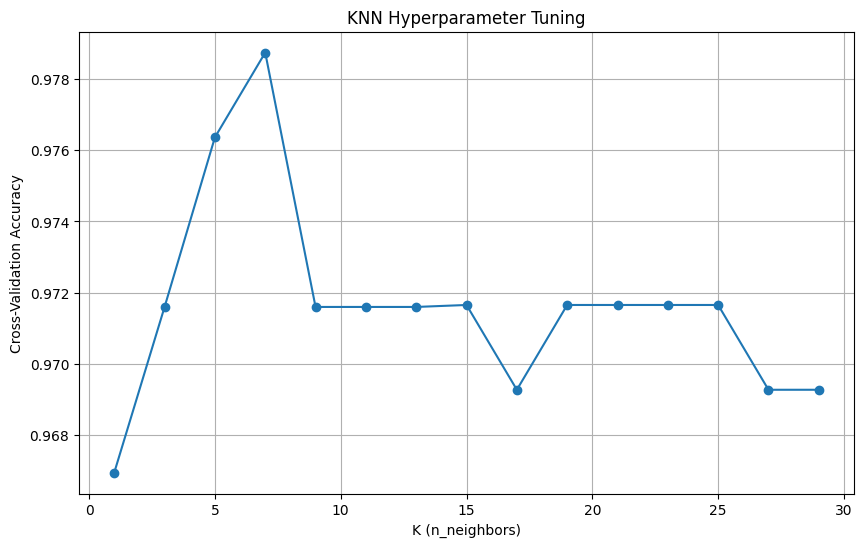

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cv_results["param_knn__n_neighbors"], 
         cv_results["mean_test_score"], 
         marker='o')
plt.xlabel("K (n_neighbors)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("KNN Hyperparameter Tuning")
plt.grid(True)
plt.show()

In [11]:
print("Best K:", knn_grid.best_params_["knn__n_neighbors"])
print("Best CV Accuracy:", knn_grid.best_score_*100)

Best K: 7
Best CV Accuracy: 97.87375415282392


In [12]:
y_pred = knn_grid.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)*100
conf_matrix = confusion_matrix(y_test, y_pred)

print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)

Test Accuracy: 95.1048951048951
Confusion Matrix:
 [[86  4]
 [ 3 50]]
